Type ctrl +F9

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
st=pd.read_csv("https://raw.githubusercontent.com/dudegladiator/Testing/main/train.csv")

In [ ]:
st.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,335.350006,338.000000,329.779999,334.750000,330.813843,28865100
1,2022-01-04,334.829987,335.200012,326.119995,329.010010,325.141357,32674300
2,2022-01-05,325.859985,326.070007,315.980011,316.380005,312.659882,40054300
3,2022-01-06,313.149994,318.700012,311.489990,313.880005,310.189270,39646100
4,2022-01-07,314.149994,316.500000,310.089996,314.040009,310.347412,32720000


In [ ]:
st=st.drop(labels=["Date","Open","High","Low","Close"],axis=1)

# **Correlation Coefficient**

Finding the correlation between stock price and volume

In [ ]:
st["Adj Close"].corr(st["Volume"])

0.14781846713930535

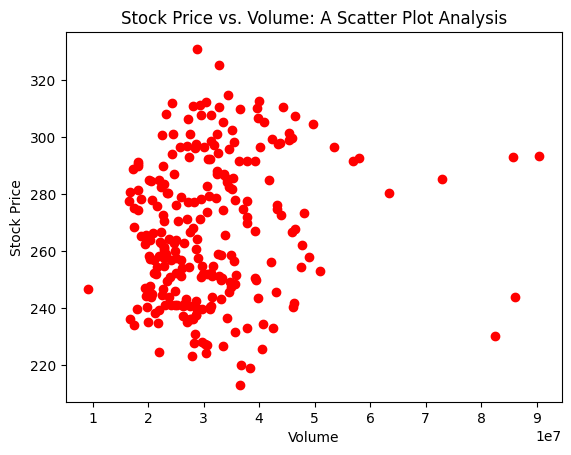

In [ ]:
plt.scatter(st["Volume"], st["Adj Close"],color='r')
plt.title("Stock Price vs. Volume: A Scatter Plot Analysis")
plt.xlabel("Volume")
plt.ylabel("Stock Price")
plt.savefig('Correlation Coefficeint') #To download this plot

# **Regression analysis**

### Manually

Using Matrix

In [ ]:
Y=st[["Adj Close"]].copy()
X=st[["Volume"]].copy()

In [ ]:
X["intercept"]=1
X=X[["Volume","intercept"]]

In [ ]:
X_T=X.T
B=np.linalg.inv(X_T @ X) @ X_T @ Y

In [ ]:
B

,Adj Close
0,3.211609e-07
1,2.568475e+02


### With the help of  Function

In [ ]:
x=st[["Volume"]].copy()

In [ ]:
y=st[["Adj Close"]].copy()

using Linear regressor function

In [ ]:
regressor=LinearRegression()
result1=regressor.fit(x,y)

In [ ]:
y_predict1=result1.predict(x)

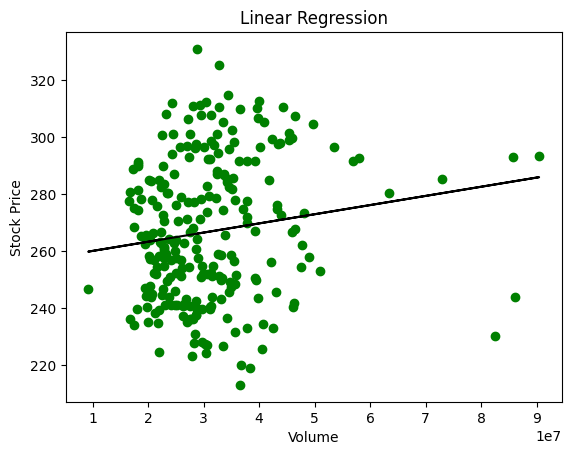

In [ ]:
plt.scatter(x,y,color='g')
plt.plot(x,y_predict1,color='k')
plt.title("Linear Regression")
plt.xlabel("Volume")
plt.ylabel("Stock Price")
plt.savefig("Linear Regression") # Saving the figure (Present in the report)

# **Outliers**

### Drawing Leverage Plot

In [ ]:
model = sm.OLS(y, sm.add_constant(x)).fit()

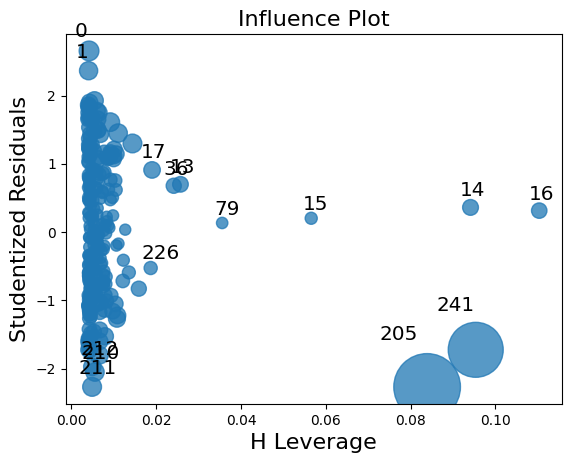

In [ ]:
sm.graphics.influence_plot(model)
plt.savefig("Leverage plots")

### Removing outliers

In [ ]:
stand_resids = model.resid_pearson                                 #Finding the Standardized residual

In [ ]:
newst=st
newst=pd.concat([newst,pd.DataFrame(stand_resids)],axis=1)
newst=newst.rename(columns={0:"stand_resids"})

In [ ]:
newst

,Adj Close,Volume,stand_resids
0,330.813843,28865100,2.616506
1,325.141357,32674300,2.337616
2,312.659882,40054300,1.736969
3,310.189270,39646100,1.642352
4,310.347412,32720000,1.738709
...,...,...,...
246,238.133545,21207000,-1.032305
247,236.367981,16688600,-1.045022
248,233.944031,17457100,-1.153035
249,240.407837,19770700,-0.921670


In [ ]:
newst.to_csv("WithOutliers.csv")

removing the standard residual whose value is more than 1.90 or less than -1.90

In [ ]:
newst.drop(newst[(newst['stand_resids'] >= 1.90) | (newst['stand_resids'] <= -1.90) ].index, inplace = True)

In [ ]:
newst

,Adj Close,Volume,stand_resids
2,312.659882,40054300,1.736969
3,310.189270,39646100,1.642352
4,310.347412,32720000,1.738709
5,310.574677,44289500,1.597627
6,311.276337,29386800,1.819572
...,...,...,...
246,238.133545,21207000,-1.032305
247,236.367981,16688600,-1.045022
248,233.944031,17457100,-1.153035
249,240.407837,19770700,-0.921670


In [ ]:
newst.to_csv("RemovedOutliers.csv")

### Making the data ready

In [ ]:
newx=newst[["Volume"]].copy()

In [ ]:
newy=newst[["Adj Close"]].copy()

### New Leverage Plot

In [ ]:
newmodel = sm.OLS(newy, sm.add_constant(newx)).fit()

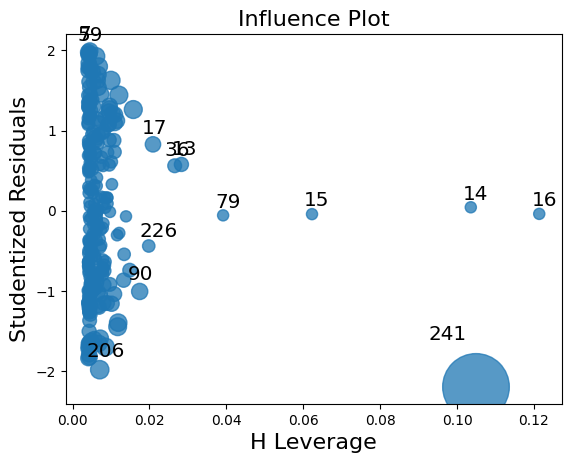

In [ ]:
sm.graphics.influence_plot(newmodel)
plt.savefig("After Removing Leverage PLot")

### New Correlation Coefficient

In [ ]:
newst["Adj Close"].corr(newst["Volume"])

0.21368662347751452

###**Linear** Regression

In [ ]:
result2 = regressor.fit(newx,newy)

In [ ]:
result2.coef_                                                          # Slope of the new function

array([[4.56156933e-07]])

In [ ]:
result2.intercept_                                                     # Intercept of the new function

array([252.82169341])

In [ ]:
ypredict2=result2.predict(newx)

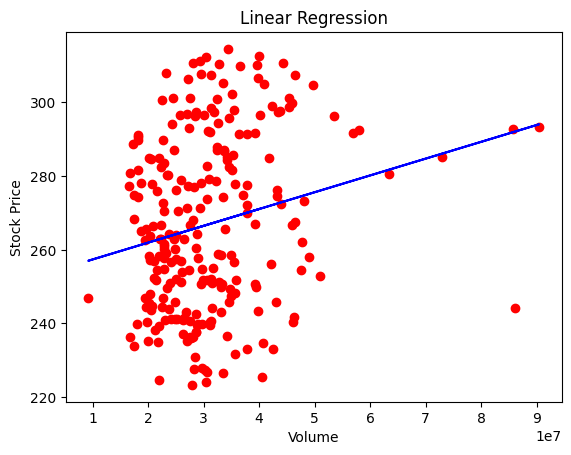

In [ ]:
plt.scatter(newx,newy,color='r')
plt.plot(newx,ypredict2,color='b')
plt.title("Linear Regression")
plt.xlabel("Volume")
plt.ylabel("Stock Price")
plt.savefig("New Linear Regression")

# Prediction

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/dudegladiator/Testing/main/test.csv")                                             #Loading the testing data

In [ ]:
ypredict3=result2.predict(df[["Volume"]])

In [ ]:
#Adding older datas
ypredict3=np.insert(ypredict3, 0,239.220825, axis=0)
ypredict3=np.insert(ypredict3, 0,240.407837, axis=0)
ypredict3=np.insert(ypredict3, 0,233.944031, axis=0)

In [ ]:
#Making the model more accurate by giving wieght to older datas
for i in range(3,len(ypredict3),1):
  ypredict3[i][0]=(ypredict3[i][0]+4*ypredict3[i-1][0]+3*ypredict3[i-2][0]+2*ypredict3[i-3][0]-10)/10


In [ ]:
ypredict3=np.delete(ypredict3,[0,1,2])

In [ ]:
df=df.drop(axis=1,labels=["Date","Open","High","Low","Close",])

In [ ]:
df=pd.concat([df,pd.DataFrame(ypredict3)],axis=1)

In [ ]:
df=df.rename(columns={0:"Predicted Price"})

In [ ]:
df.head()

,Adj Close,Volume,Predicted Price
0,238.981430,25740000,240.055805
1,228.527618,50623400,242.461528
2,221.754562,39585600,242.933411
3,224.368011,43613600,244.194618
4,226.552551,27369800,244.580838


In [ ]:
df.to_csv("PredictedPrice.csv")

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(df["Adj Close"], df["Predicted Price"],squared=False)

In [ ]:
rmse

10.18369782449089


                                                             ***Thank You***
